In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
RC = np.loadtxt("rnd_sph_cat_R95.0_cut_0.cat")
OC = np.loadtxt("sphere_data_cut_0.dat")

N_rnd = RC.shape[0]
N_obs = OC.shape[0]

##### RE-CENERING!!!!  ############################################# Hey! To Do Centering
for x in OC:
    x += np.array([400,400,400])
  
FC = np.loadtxt("FC_CUT_0.cat")

XDLBSkel = np.loadtxt("0.BSKIndex")
XDLBSkel.shape

a = XDLBSkel[:,0]
a = list(a)
b = XDLBSkel[:,1]
b = list(b)

c = []
c.extend(a)
c.extend(b)
d = []
d.extend(b)
d.extend(a)

c = np.array(c, dtype=int)
d = np.array(d, dtype=int)

fcBSkel = np.vstack((c,d)).T

a = b = c = d = 0

print("Beta Skeleton array.shape:", fcBSkel.shape)
print("")

VoidParticleCat = np.loadtxt("void_masterlist_0.cat")
print("Void Particle Cat")
print("VoidID, x, y, z")
print("Shape", VoidParticleCat.shape)

Beta Skeleton array.shape: (221050, 2)

Void Particle Cat
VoidID, x, y, z
Shape (15076, 4)


In [3]:
Void_N_particles_list = VoidParticleCat[:,0].astype(int)

# Void ID, Particles in this void.
Void_N_Particles = []

for i in range( Void_N_particles_list.max()):
    index = np.where(Void_N_particles_list == i)[0]
    Void_N_Particles.append([i, index.shape[0]])
    
Void_N_Particles = np.array(Void_N_Particles).astype("int")

<IPython.core.display.Javascript object>


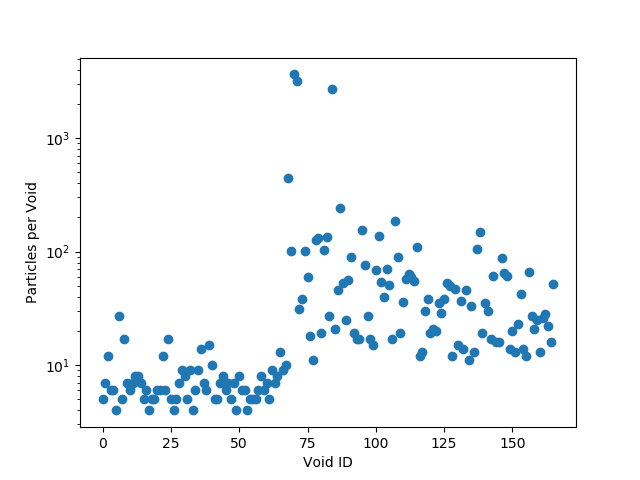

In [4]:
plt.scatter( Void_N_Particles[:,0], Void_N_Particles[:,1])
plt.yscale("log")

plt.ylabel("Particles per Void")
plt.xlabel("Void ID")

plt.show()

In [5]:
VoidParticleCat[:20,:]

array([[  0.        , -13.79489548,   6.23746821, -35.31215108],
       [  0.        ,  -8.57559598,   8.73835735, -36.12764719],
       [  0.        , -16.36843865,   6.42072641, -37.08545995],
       [  0.        , -16.35820635,   2.27206366, -36.65991717],
       [  0.        , -13.77301516,   6.55994183, -34.60651906],
       [  1.        ,  72.66740861, -55.55710855,  16.73390416],
       [  1.        ,  71.29058591, -52.91655396,  21.87345363],
       [  1.        ,  75.55235506, -54.23921456,  16.47179387],
       [  1.        ,  70.71199203, -55.00920965,  15.65052362],
       [  1.        ,  70.12868902, -57.02684056,  17.64991875],
       [  1.        ,  75.16091276, -54.59251477,  19.87925161],
       [  1.        ,  74.39494621, -58.00555463,  10.7439143 ],
       [  2.        ,  75.54063802, -31.25574826, -30.18601299],
       [  2.        ,  84.30090059, -30.61171918, -22.47526952],
       [  2.        ,  78.62253914, -33.98563186, -29.55868541],
       [  2.        ,  80

In [37]:

filename = "void_stats.stats"

with open(filename, "w") as f:
    f.write("# Void_ID, Void_Volume, r = (a*b*c)**(1/3.0), a, b, c, vector_a, vector_b, vector_c \n")

    for ID in Void_N_Particles[:,0]:
        #print(ID)
        #PlotVoidInCatalog(ID, 10)

        index = np.where( VoidParticleCat[:,0] == ID)[0]
        Void_n = VoidParticleCat[index, 1:4]
        particles_void_N = Void_n.shape[0]

        ###########################################
        #       Move to center of mass
        #           frame of reference.
        x = Void_n[:,0]
        y = Void_n[:,1]
        z = Void_n[:,2]

        x_c = x.mean()
        y_c = y.mean()
        z_c = z.mean()

        x -= x.mean()
        y -= y.mean()
        z -= z.mean()
        #
        ###########################################


        ##########################################
        #        Calcule Inertia Tensor
        #              for Void Particles.
        I_11 = 0
        I_22 = 0
        I_33 = 0

        I_12 = 0
        I_13 = 0
        I_23 = 0

        for k in range( particles_void_N ):
            I_11 += y[k]**2 + z[k]**2
            I_22 += z[k]**2 + x[k]**2
            I_33 += x[k]**2 + y[k]**2

            I_12 += - x[k] * y[k]
            I_13 += - z[k] * x[k]
            I_23 += - y[k] * z[k]

        I_21 = I_12
        I_31 = I_13
        I_32 = I_23

        I = np.array([
            [I_11, I_12, I_13],
            [I_21, I_22, I_23],
            [I_31, I_32, I_33]])

        I = I/particles_void_N  # mass = \sum_1^N 1 / N = 1
        #
        ###################################################


        ###################################################
        #   Eigenvalues (w[i])
        #          and
        #   EigenVector  (v[i])
        #
        w, v = np.linalg.eig(I)


        w_max_index = np.where(w == w.max())[0]
        w_min_index = np.where(w == w.min())[0]
        w_med_index = np.where( (w != w.max()) & (w != w.min()))[0]


        # Sort semiaxes by length.
        # a - major semi-axis
        # b - med. semi-axis
        # c - minor semi-axis

        I_a = w[ w_min_index[0] ]
        I_b = w[ w_med_index[0] ]
        I_c = w[ w_max_index[0] ]

        a = ((5.0/2.0)*( -I_a + I_b + I_c))**0.5
        b = ((5.0/2.0)*( +I_a - I_b + I_c))**0.5
        c = ((5.0/2.0)*( +I_a + I_b - I_c))**0.5

        axis_a = v[:, w_min_index]
        axis_b = v[:, w_med_index]
        axis_c = v[:, w_max_index]
        #
        ##################################################

        vectors = [axis_a, axis_b, axis_c]

        str_vectors = ""

        for i in range(3):
            for j in range(3):
                str_vectors += str(vectors[i][j][0]) + ", "
        
        V = (4.0 / 3.0) * np.pi * a * b * c   

        stats = "{}, {}, {}, {}, {}, {}, {}\n".format(ID, V, (a*b*c)**(1/3.0), a, b, c, str_vectors)
        f.write(stats)